![](https://upload.wikimedia.org/wikipedia/commons/f/f3/Memphis_Tennessee-2014.jpg)


In this tutorial we will be working with Housing Dataset and try to find the house prices using Regression Techniques. We will take a look at **R-Squared, Mean Absolute Error and Outlier Detection.**

First of all let's import the libraries and the dependencies.

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [3]:
test = pd.read_csv('/kaggle/input/housingdataset/california_housing_test.csv')
train = pd.read_csv('/kaggle/input/housingdataset/california_housing_train.csv')

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


There are no-null values and the data type is `float64`. To reduce the memory usage we have converted `float64` to `float32`

In [8]:
train = train.select_dtypes(include='float64').astype('float32')
test = test.select_dtypes(include='float64').astype('float32')

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562103,2.005167,-124.349998,-121.790001,-118.489998,-118.000000,-114.309998
latitude,17000.0,35.625225,2.137340,32.540001,33.930000,34.250000,37.720001,41.950001
housing_median_age,17000.0,28.589354,12.586937,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,17000.0,2643.664307,2179.947021,2.000000,1462.000000,2127.000000,3151.250000,37937.000000
total_bedrooms,17000.0,539.410828,421.499451,1.000000,297.000000,434.000000,648.250000,6445.000000
population,17000.0,1429.573853,1147.852905,3.000000,790.000000,1167.000000,1721.000000,35682.000000
households,17000.0,501.221954,384.520844,1.000000,282.000000,409.000000,605.250000,6082.000000
median_income,17000.0,3.883578,1.908157,0.499900,2.566375,3.544600,4.767000,15.000100
median_house_value,17000.0,207300.906250,115983.765625,14999.000000,119400.000000,180400.000000,265000.000000,500001.000000


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,3000.0,-119.589211,1.994936,-124.180000,-121.809998,-118.485001,-118.019997,-114.489998
latitude,3000.0,35.635391,2.129670,32.560001,33.930000,34.270000,37.689999,41.919998
housing_median_age,3000.0,28.845333,12.555395,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,3000.0,2599.578613,2155.593262,6.000000,1401.000000,2106.000000,3129.000000,30450.000000
total_bedrooms,3000.0,529.950684,415.654358,2.000000,291.000000,437.000000,636.000000,5419.000000
population,3000.0,1402.798706,1030.542969,5.000000,780.000000,1155.000000,1742.750000,11935.000000
households,3000.0,489.911987,365.422699,2.000000,273.000000,409.500000,597.250000,4930.000000
median_income,3000.0,3.807272,1.854512,0.499900,2.544000,3.487150,4.656475,15.000100
median_house_value,3000.0,205846.265625,113119.687500,22500.000000,121200.000000,177650.000000,263975.000000,500001.000000


## Outlier Detection

***Wikipedia definition***,
"In statistics, an outlier is an observation point that is distant from other observations."

The above definition suggests that outlier is something which is separate/different from the crowd.

Finding outliers by looking at the data could be easy but it may be a quite challenging task when you have got thousands or even millions of datapoints. We have used IQR (Inter-Quartlie Range) to find out the outliers and then took them away so our model doesn't perform poor.

In [11]:
data = train['median_house_value']

fig = go.Figure()
fig.add_trace(go.Box(x=data,
                     quartilemethod="linear", 
                     name=' ',
                     marker=
                     dict(
                         color='steelblue',
                         outliercolor='red'
                         )
                    )
             )


fig.update_layout(title_text="Outliers in Training Set", xaxis_title="Median House Value ($)")

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()

In [12]:
dataset = sorted(train.median_house_value)
q1, q3 = np.percentile(dataset,[25,75])
iqr = q3-q1
print('IQR =', iqr)
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
print('Lower Fence ($) =',lower_fence)
print('Upper Fence ($) =',upper_fence)

IQR = 145600.0
Lower Fence ($) = -99000.0
Upper Fence ($) = 483400.0


Since there are only positive values in our dataset and there are no values lesser than the `lower fence` that we have calculated hence we are only gonna be using the `upper fence` to treat the outliers. Now lets go ahead and remove the outliers using the upper fence and store the data in the `train` dataframe.

In [13]:
train = train[train.median_house_value < upper_fence]
train = train[train.median_house_value > lower_fence]
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.309998,34.189999,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.470001,34.400002,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.559998,33.689999,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.570000,33.639999,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.570000,33.570000,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.260002,40.580002,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.269997,40.689999,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.300003,41.840000,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.300003,41.799999,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


We would also apply the same technique of Outlier Detection and Removal on the test set as well.

In [14]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.050003,37.369999,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.300003,34.259998,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.809998,33.779999,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.360001,33.820000,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.669998,36.330002,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.860001,34.419998,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.139999,34.060001,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.699997,36.299999,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.120003,34.099998,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


We are using the boxplot to visualize the outliers

In [15]:
data = test['median_house_value']

fig = go.Figure()
fig.add_trace(go.Box(x=data,
                     quartilemethod="linear", 
                     name=' ',
                     marker=
                     dict(
                         color='steelblue',
                         outliercolor='red'
                         )
                    )
             )


fig.update_layout(title_text="Outliers in Test Set", xaxis_title="Median House Value ($)")

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()

### Outlier Detection and removal

In [16]:
dataset = sorted(test.median_house_value)
q1, q3 = np.percentile(dataset,[25,75])
testiqr = q3-q1
test_lower_fence = q1-(1.5*iqr)
test_upper_fence = q3+(1.5*iqr)
print('IQR ($) =', testiqr)
print('Lower Fence in Test set ($) =', test_lower_fence)
print('Upper Fence in Test set ($) =', test_upper_fence)

IQR ($) = 142775.0
Lower Fence in Test set ($) = -97200.0
Upper Fence in Test set ($) = 482375.0


In [17]:
test = test[test.median_house_value < test_upper_fence]
test = test[test.median_house_value > test_lower_fence]
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.050003,37.369999,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.300003,34.259998,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.809998,33.779999,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.360001,33.820000,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.669998,36.330002,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2994,-117.930000,33.860001,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.860001,34.419998,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.139999,34.060001,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.699997,36.299999,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


## Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

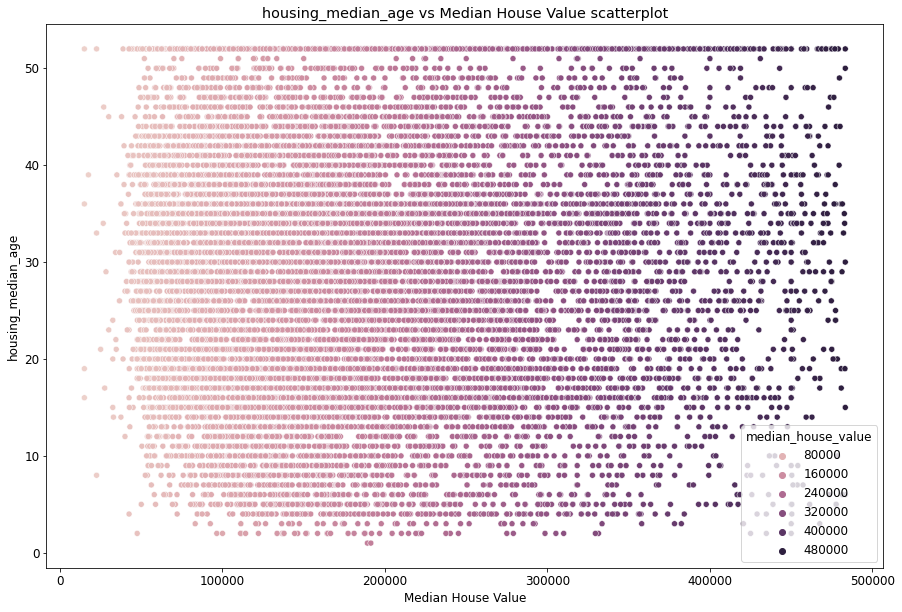

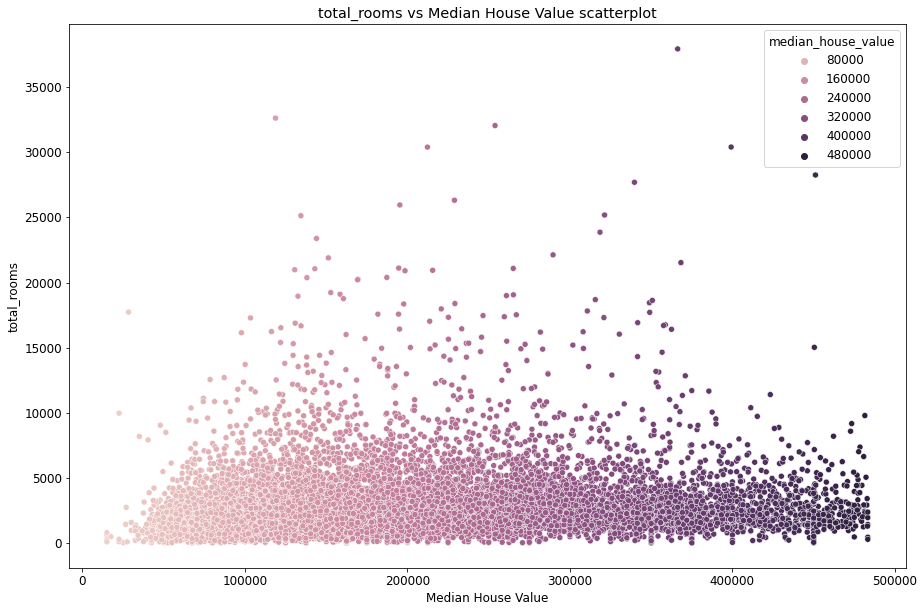

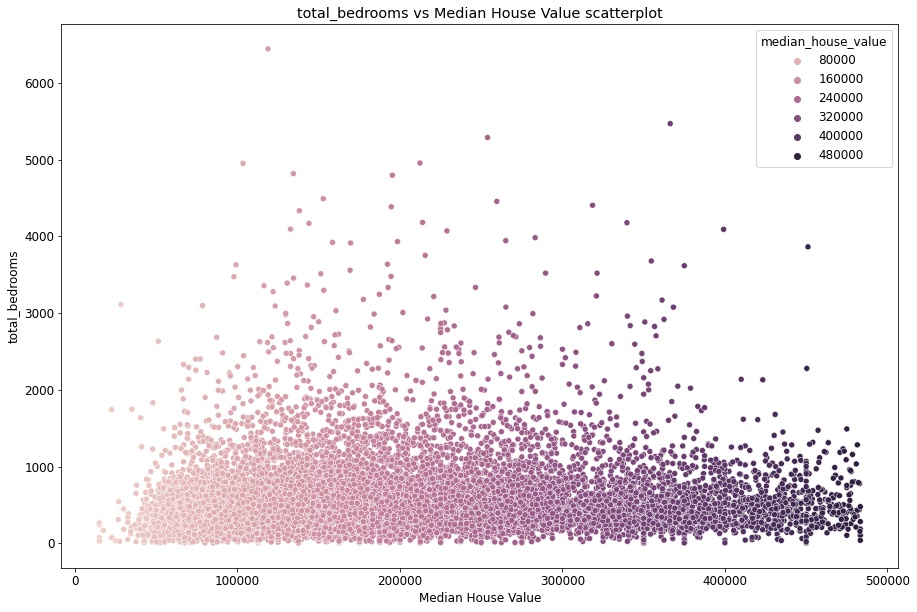

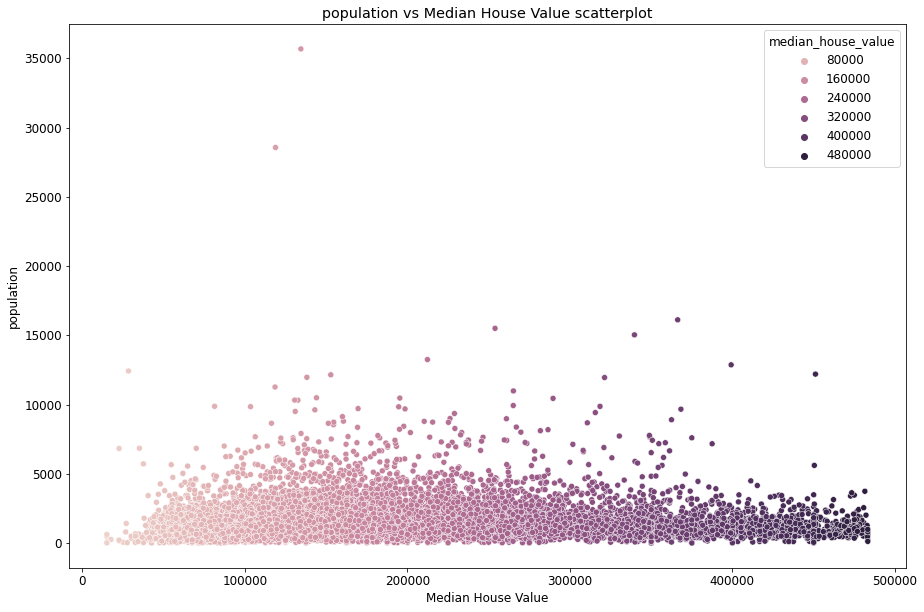

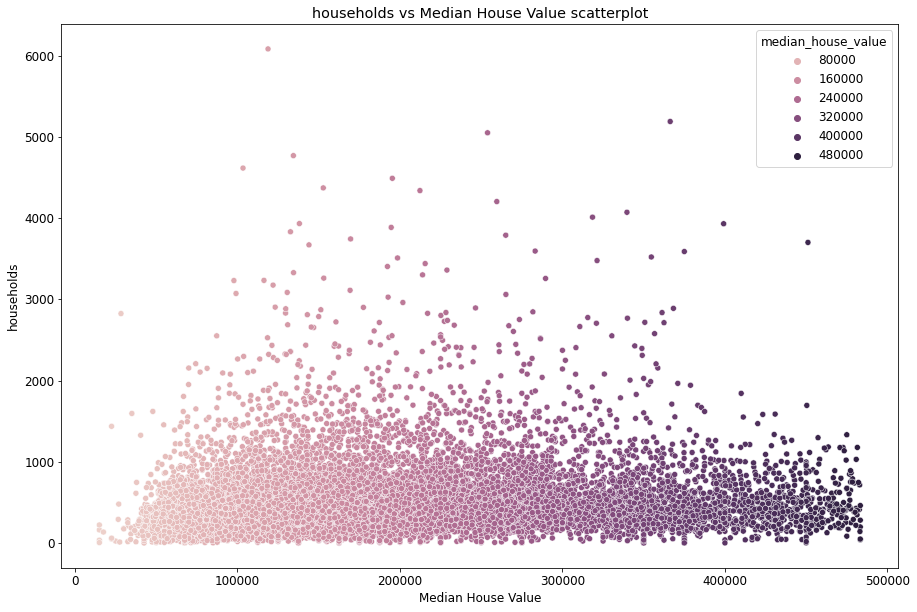

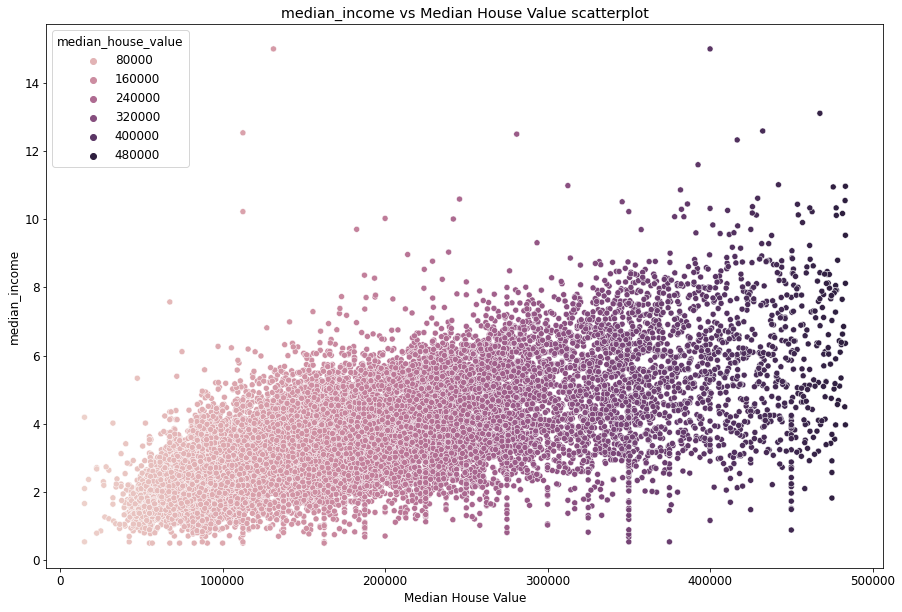

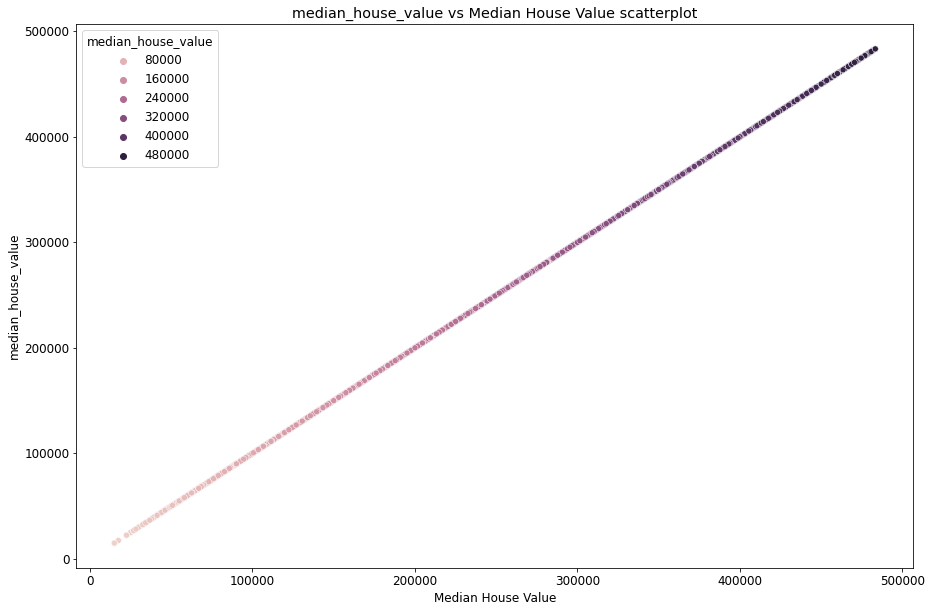

In [18]:
for i in train.columns[2:]:
    sns.scatterplot(y=train[i], x=train['median_house_value'], hue= train['median_house_value'])
    plt.xlabel('Median House Value')
    plt.title(i+' '+'vs Median House Value scatterplot')
    plt.show()

Above shows the charts displaying the relation between the various features and the Target column which is `median_house_value`. Let's take a look at the counts of the individual values and their spread using the `histplot` in `seaborn` library.

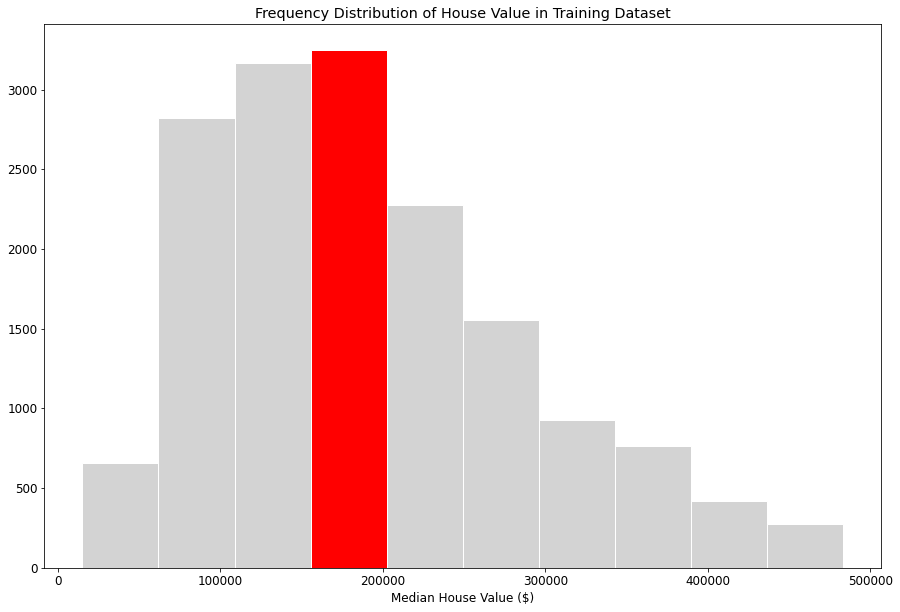

In [19]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(np.array(train.median_house_value), edgecolor='white', color='lightgray',linewidth=1)
for i in range(3,4):
    patches[i].set_facecolor('r')
    plt.title('Frequency Distribution of House Value in Training Dataset')
    plt.xlabel('Median House Value ($)')
    plt.show()

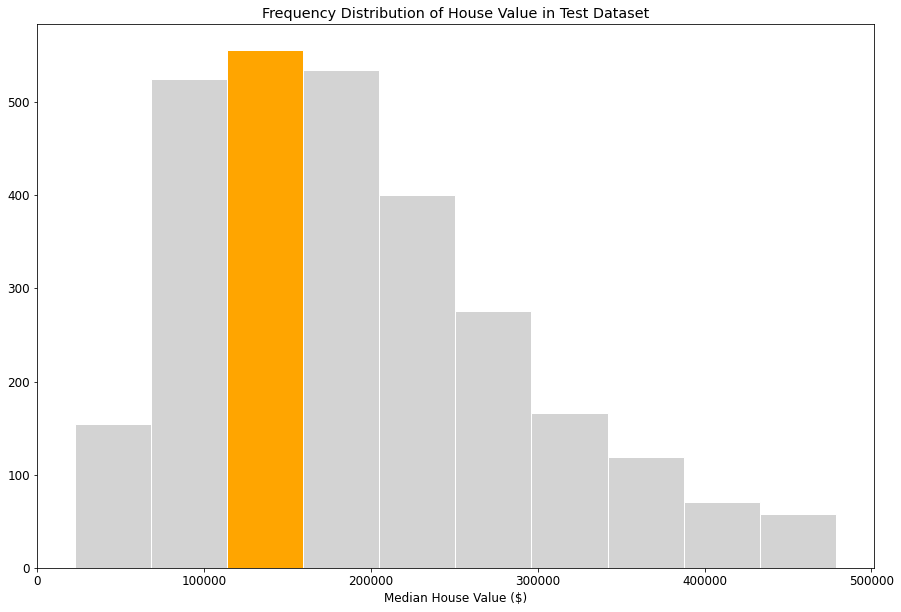

In [20]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(np.array(test.median_house_value), edgecolor='white', color='lightgray',linewidth=1)
for i in range(2,3):
    patches[i].set_facecolor('orange')
    plt.title('Frequency Distribution of House Value in Test Dataset')
    plt.xlabel('Median House Value ($)')
    plt.show()

We can see the outliers have been removed from the both dataset which will help us predict the results aka the House Prices better. You can also remove the outliers with the help of `z-score` which is calculated by:-

![](https://www.gstatic.com/education/formulas2/443397389/en/z_score.svg)

where:

*μ* is the mean of the population,

*σ* is the standard deviation of the population.

In [21]:
print('The mean of the target class in Training Dataset is ${}.'.format(np.mean(train.median_house_value)))
print('The Standard Deviation of the target class in Training Dataset is ${}.'.format(np.std(train.median_house_value)))

The mean of the target class in Training Dataset is $191068.3125.
The Standard Deviation of the target class in Training Dataset is $95883.4296875.


### Correlation among the variables/features.

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.


*For example*, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2)
 

**How does correlation help in feature selection?**

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

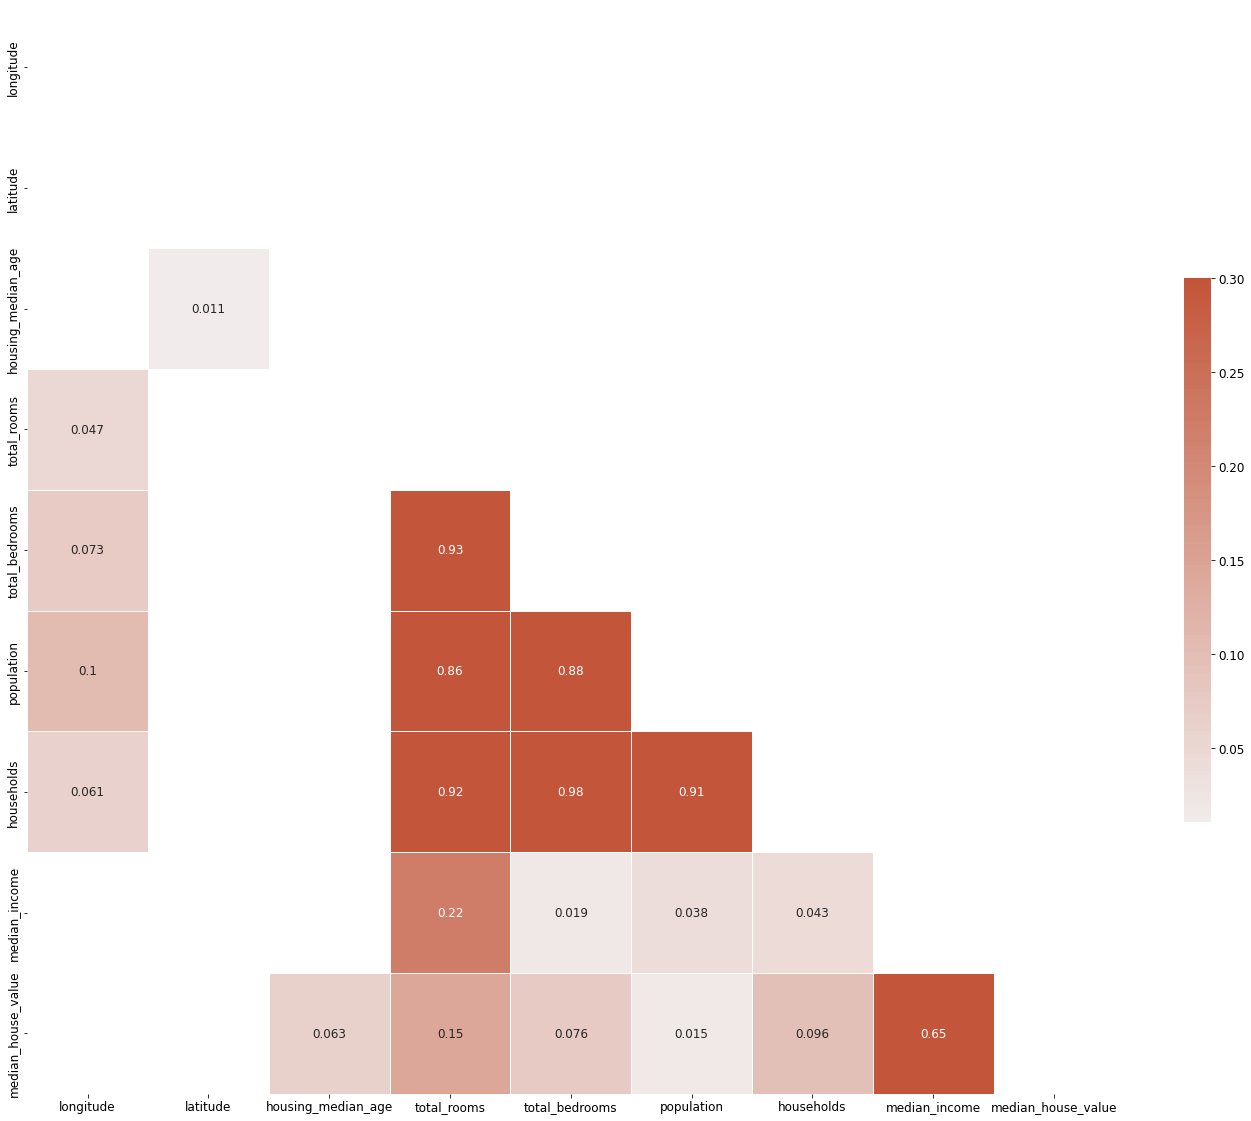

In [22]:
corr = train.corr()
corr = corr[corr > 0.0]
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

Looking at the heatmap above, we can see that latitude and longitude have no positive relation with the dependent variable hence it will be a good idea to drop them from the model that we are going to build later on.

In [23]:
train.drop(['longitude', 'latitude'], axis=1, inplace=True)
test.drop(['longitude', 'latitude'], axis=1, inplace=True)

## Data Scaling

We want to scale the data as in the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower.

In [24]:
Train = train.copy()
scaler = StandardScaler()
scaler.fit(Train[Train.columns])
Train[train.columns] = scaler.transform(Train[Train.columns])

## Extracting Input and Target Values for data splitting

In [25]:
target = Train[Train.columns[-1]]
Train = Train[Train.columns[0:-1]]

In [26]:
Train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.064394,1.366177,1.747404,-0.372449,-0.081243,-1.393643
1,-0.744245,2.299489,3.204428,-0.274287,-0.104505,-1.185110
2,-0.904319,-0.874137,-0.867224,-0.959695,-0.998804,-1.293146
3,-1.144431,-0.516475,-0.482928,-0.802981,-0.717074,-0.308748
4,-0.664207,-0.537999,-0.508862,-0.709125,-0.624026,-1.118027


In [27]:
target.head()

0   -1.294992
1   -1.157325
2   -1.098921
3   -1.227202
4   -1.309593
Name: median_house_value, dtype: float32

## Splitting Data
We start the process of training our data now that we are done with preprocessing of the data. Lets go ahead and split the data into 2 splits i.e. training and validation data. We have taken the test size as 0.25 since we don't want to train our model on the entire dataset and then end up having the model learn nothing when new set of data is thrown at it.

In [28]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(Train.values, 
                                                                        target.values, 
                                                                        test_size=0.25, 
                                                                        random_state=42)
print('Training Data Shape -',train_inputs.shape)
print('Test Data Shape -',val_inputs.shape)

Training Data Shape - (12078, 6)
Test Data Shape - (4027, 6)


In [29]:
X = Train.values
y= target.values

Implementing Gradient Descent to see how close we can get to the actual results

In [30]:
#Function For EarlyStopping
def EarlyStopping(loss):
    for i in range(1, len(loss)):
        yield (loss[i-1], loss[i])
        
#Creation of Batches        
def batch_size(batchsize, X):
    batches = round(X.shape[0]//batchsize)
    return batches

In [31]:
N = X.shape[0]
learning_rate=0.1
LR = []
loss = []
Intercept = []
Slope = []
batchsize =  50
decay_rate =  0.01
m=np.ones(X.shape[1])                  #initializing some values of slope
b=1                                     #initializing some values of intercept
batches = batch_size(batchsize, X)
print(f'The initial Value of w and b are {m} {b} and {batches} have been created.')
for i in range(1000):
    epoch = i
    for j in range(batches):
        if i==0:
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = learning_rate
                yhat = np.dot(X,m) + b                                 #Predictions
                MSE = (np.sum((y-yhat)**2))/N                           #Error 
                r_squared = r2_score(y,yhat)
                loss_slope_b = -(2/N)*sum(y-yhat)                     #wrt to b aka intercept
                loss_slope_m = -(2/N)*(np.dot((y - yhat),X))          #wrt to the slope of the line
                m = m - (learning_rate*loss_slope_m)
                b = b - (learning_rate*loss_slope_b)
            else:
                m = m
                b = b
                
        else:
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = [(1/(1+decay_rate))* learning_rate for j in range(batches)][0]
                yhat = np.dot(X,m) + b                                #Predictions
                MSE = (np.sum((y-yhat)**2))/N                         #Error 
                r_squared = r2_score(y,yhat)
                loss_slope_b = -(2/N)*sum(y-yhat)                     #wrt to b aka intercept
                loss_slope_m = -(2/N)*(np.dot((y - yhat),X))          #wrt to the slope of the line
                m = m - (learning_rate*loss_slope_m)
                b = b - (learning_rate*loss_slope_b)
            else:
                m = m
                b = b     
                
    Intercept.append(b)
    Slope.append(m)
    loss.append(MSE)
    LR.append(learning_rate)
    
    if i % batchsize == 0:
        print('===> Epoch:',i,'  Loss:  ',np.around(MSE,5) ,'  Learning Rate:  ', learning_rate, 
              '  R-Squared:  ', np.around(r_squared,5))
    
    #Early Stopping Mechanism
    for prev, curr  in EarlyStopping(loss):
        if prev - curr < 1e-9:
            print(f'Early Stopping at Epoch {i} with Loss {np.around(MSE,5)} and R-Squared {np.around(r_squared,5)}')
            break                  #Inner Loop Break
    else:
        continue                   # executed if the inner loop did NOT break
    break                          # executed if the inner loop DID break
print('The final estimates of w and b are',m, b)

The initial Value of w and b are [1. 1. 1. 1. 1. 1.] 1 and 322 have been created.
===> Epoch: 0   Loss:   0.73521   Learning Rate:   0.1   R-Squared:   0.26479
===> Epoch: 50   Loss:   0.48165   Learning Rate:   0.003072693035634063   R-Squared:   0.51835
===> Epoch: 100   Loss:   0.48144   Learning Rate:   9.44144249123408e-05   R-Squared:   0.51856
===> Epoch: 150   Loss:   0.48144   Learning Rate:   2.9010654589154553e-06   R-Squared:   0.51856
Early Stopping at Epoch 189 with Loss 0.48144 and R-Squared 0.51856
The final estimates of w and b are [ 0.22430459 -0.32616145  0.34898971 -0.28379913  0.34290487  0.75191112] 1.1125335989101164e-08


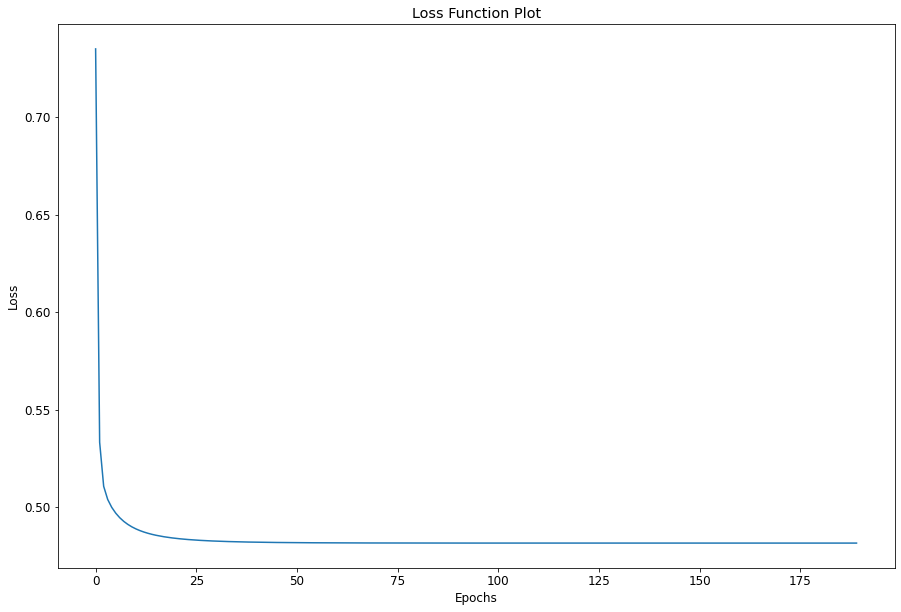

In [32]:
plt.plot(loss)
plt.title('Loss Function Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

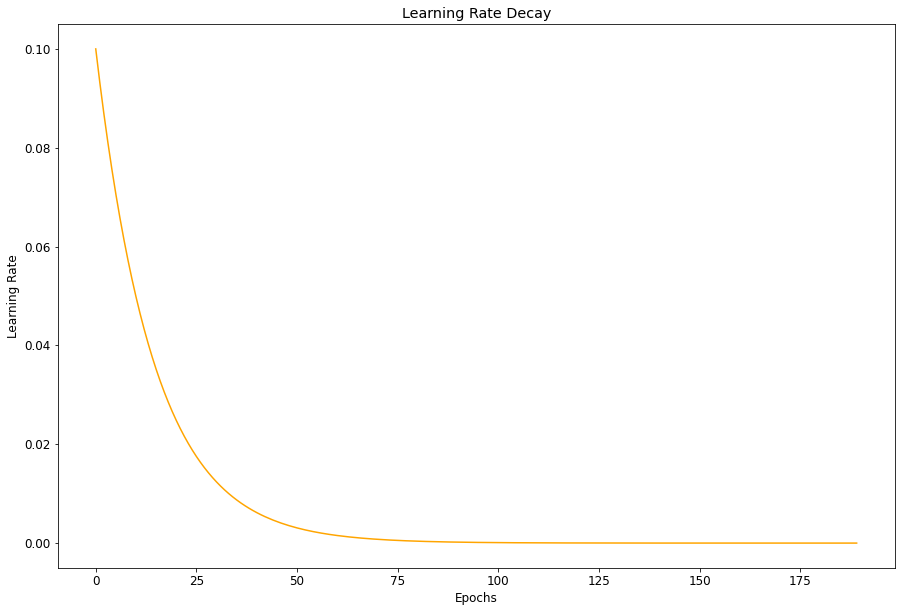

In [33]:
plt.plot(LR, color='orange')
plt.title('Learning Rate Decay')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.show()

Above is the implementation of the gradient descent algorithm to get to the values of `m` and `b` where the Loss is the minimum.

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. `Early stopping` is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

### Model Creation and Training

In [34]:
names = ['Linear Regression', "KNN", "Linear SVM","SGD Regressor", "Random Forest",'Ridge', 'Lasso']
regressors = [
    LinearRegression(n_jobs=-1),
    KNeighborsRegressor(n_neighbors=3,  n_jobs=-1, weights= 'distance' ),
    SVR(kernel="linear", C=0.8),
    SGDRegressor(early_stopping=True, learning_rate='adaptive', random_state=42),
    RandomForestRegressor(max_depth=5, n_estimators=100,  random_state=42),
    Ridge(alpha=0.8, random_state=42, solver='sag'),
    Lasso(alpha=0.8, random_state=42)]

## Model Evaluation
### 1. Mean Absolute Error

Mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. 

MAE is calculated as the sum of absolute errors divided by the sample size:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded)

### 2. R2 Score

R2 (coefficient of determination) regression score function) - The coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

![](https://www.gstatic.com/education/formulas2/443397389/en/coefficient_of_determination.svg)

### Training and calculating errors

In [35]:
MAE = []
Adj_R_Squared = []
for name, reg in zip(names, regressors):
    reg.fit(train_inputs, train_targets)
    val_preds = reg.predict(val_inputs)
    mae = mean_absolute_error(val_targets, val_preds)
    r_squared = r2_score(val_targets, val_preds)
    MAE.append(mae)
    N=target.shape[0]
    p=6
    x = (1-r_squared)
    y = (N-1) / (N-p-1)
    adj_rsquared = (1 - (x * y))
    Adj_R_Squared.append(adj_rsquared)
    print (name,'MAE: %.3f, Adjusted R-Squared: %.3f'  % (mae, adj_rsquared ))

Linear Regression MAE: 0.506, Adjusted R-Squared: 0.546
KNN MAE: 0.509, Adjusted R-Squared: 0.511
Linear SVM MAE: 0.499, Adjusted R-Squared: 0.535
SGD Regressor MAE: 0.506, Adjusted R-Squared: 0.546
Random Forest MAE: 0.527, Adjusted R-Squared: 0.516
Ridge MAE: 0.506, Adjusted R-Squared: 0.546
Lasso MAE: 0.802, Adjusted R-Squared: -0.001


In [36]:
#Creating the Dataframe
val_errors_df = pd.DataFrame()
val_errors_df['Model'] = names
val_errors_df['MAE'] = np.around(MAE,4)
val_errors_df['Adj_R_Squared'] = np.around(Adj_R_Squared,4)

x_axis = val_errors_df.Model
y0 = val_errors_df.MAE
y3 = val_errors_df.Adj_R_Squared

#defining the MAE values
go_fig = go.Figure()
MeanAbsoluteError = go.Scatter(
    x = x_axis,
    y = np.around(y0,4),
    mode = 'lines+markers',
    name = 'MAE'
)

#defining the r-squared values
Adj_R_score = go.Scatter(
    x = x_axis,
    y = np.around(y3,4),
    mode = 'lines+markers',
    name = 'Adj_R_Squared' 
)

#Adding traces
go_fig.add_trace(MeanAbsoluteError)
go_fig.add_trace(Adj_R_score)

#Updating the Layout and x-axis
go_fig.update_xaxes(showgrid=False)
go_fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
go_fig.update_layout(title='Error Metric for Model Evaluation (Validation)', 
                    xaxis_title='Models',
                   yaxis_title='Metric')
    
#Create the plot
go_fig.show()

In [37]:
val_errors_df.sort_values('Adj_R_Squared', ascending = False)

,Model,MAE,Adj_R_Squared
3,SGD Regressor,0.5056,0.5464
0,Linear Regression,0.5059,0.5455
5,Ridge,0.5059,0.5455
2,Linear SVM,0.4988,0.5346
4,Random Forest,0.5271,0.5158
1,KNN,0.5090,0.5114
6,Lasso,0.8017,-0.0007


## Picking out the best model

Let's pick the `SGDRegressor` model based on the chart above and try to see how well it is performing on making predictions.

In [38]:
model = SGDRegressor(early_stopping=True, learning_rate='adaptive', random_state=42)
model.fit(train_inputs,train_targets)
print('The coefficient of the SGDRegressor is',model.coef_)
print('The intercept of the SGDRegressor is',model.intercept_)

The coefficient of the SGDRegressor is [ 0.21637989 -0.4564414   0.36039736 -0.34146559  0.50473055  0.77766302]
The intercept of the SGDRegressor is [-0.00017932]


In [39]:
print(f"It took our SGDRegressor {model.n_iter_} epochs to converge and reach the solution.")

It took our SGDRegressor 44 epochs to converge and reach the solution.


In [40]:
print(f"The number of weights updated during the training were {int(model.t_)}.")

The number of weights updated during the training were 531433.


## Making Predictions on Training Data

Let's now visualise how good of a job our model has done while predicting the values. We will do this by using `predict` method and visualizing this with the help of `plotly`

In [41]:
preds = model.predict(val_inputs)
predsdf = pd.DataFrame()
predsdf['Targets'] =  np.around(val_targets,3)
predsdf['Predictions'] =  np.around(preds,3)

In [42]:
fig = px.scatter(predsdf, 
                 x='Targets',
                 y='Predictions', 
                 trendline="ols",
                 trendline_color_override= 'red',
                 template='simple_white',
                 color_discrete_sequence=["lightgray"],
                 title = 'Targets vs Predictions, SGDRegressor (Train)')

fig.add_annotation(x=-0.2, y = 0.05,
                   font = dict(size = 15),
                   text="OLS Trendline", 
                   bgcolor= 'orange',
                   bordercolor= 'black',
                   font_color='black', 
                   font_family='Arial', 
                   arrowhead=2)

fig.show()

As we see that our model has done a pretty decent job in making predictions hence we should be using the `LinearRegression` model on this dataset. Let's also score the model.

In [43]:
val_preds = model.predict(val_inputs)
val_preds = val_preds.reshape(-1,1)
N=target.shape[0]
p=6
x = (1-r2_score(val_targets, val_preds))
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print('The Adjusted R-squared score of SGDRegressor on training data is', adj_rsquared)

The Adjusted R-squared score of SGDRegressor on training data is 0.5463643583101383


We can see the data is spread across the chart and the model is not able to predict the values well which is what is also reflected in the Adjusted R-Squared score. Now let's go ahead and validate this on the `Test` dataframe and see if we can replicate the score or not.

In [44]:
test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...
2994,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


## Transforming Test Data and making predictions

Let's scale the features as we did on the `train` dataset. Since our model is already trained, we will just use the predict method to see what those predictions are, plot them on a graph and see what's the score.

In [45]:
test[test.columns] = scaler.transform(test[test.columns])
test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.103947,0.575289,0.280949,0.077027,0.265104,1.874202,1.602276
1,1.176650,-0.512353,-0.546585,-0.549828,-0.585255,-0.048530,-0.151938
2,-0.103947,0.439735,-0.082129,0.031391,-0.021795,1.353445,0.828419
3,-0.023909,-1.173182,-1.242090,-1.204237,-1.272780,1.572264,1.448964
4,-0.744245,-0.635543,-0.702189,-0.514524,-0.688643,-0.471153,-1.140638


In [46]:
Test = test.copy()
#Separating X and y Values
Test = Test[Test.columns[0:-1]]
testtarget = Test[Test.columns[-1]]
Test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.103947,0.575289,0.280949,0.077027,0.265104,1.874202
1,1.176650,-0.512353,-0.546585,-0.549828,-0.585255,-0.048530
2,-0.103947,0.439735,-0.082129,0.031391,-0.021795,1.353445
3,-0.023909,-1.173182,-1.242090,-1.204237,-1.272780,1.572264
4,-0.744245,-0.635543,-0.702189,-0.514524,-0.688643,-0.471153


In [47]:
Test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.103947,0.575289,0.280949,0.077027,0.265104,1.874202
1,1.176650,-0.512353,-0.546585,-0.549828,-0.585255,-0.048530
2,-0.103947,0.439735,-0.082129,0.031391,-0.021795,1.353445
3,-0.023909,-1.173182,-1.242090,-1.204237,-1.272780,1.572264
4,-0.744245,-0.635543,-0.702189,-0.514524,-0.688643,-0.471153
...,...,...,...,...,...,...
2994,0.536352,-0.777509,-0.850721,-0.802120,-0.851477,1.221387
2995,-0.424096,-0.539830,0.236153,-0.163210,0.267689,-1.594637
2996,-0.103947,1.203603,1.273517,1.763852,1.376516,-0.181674
2997,-1.464580,-0.766060,-0.803568,-0.649711,-0.732582,-0.885152


In [48]:
#Making Predictions
test_preds = model.predict(Test)  

#Creating Dataframe 
testpredsdf = pd.DataFrame()
testpredsdf ['Targets'] =  np.around(testtarget,3)
testpredsdf ['Predictions'] =  np.around(test_preds,3)

#Plotting the Graph
fig = px.scatter(
                 testpredsdf , 
                 x='Targets',
                 y='Predictions', 
                 trendline="ols",
                 trendline_color_override= '#000000',
                 template='simple_white', 
                 color_discrete_sequence=["lightsteelblue"],
                 title = 'Targets vs Predictions, SGDRegressor (Test)'
                )
fig.add_annotation(x=5, y = 3.3,
                   font = dict(size = 12),
                   text="OLS Trendline", 
                   bgcolor= 'lightsteelblue',
                   bordercolor= 'black',
                   font_color='black', 
                   font_family='Arial', 
                   arrowhead=2)

fig.show()

In [49]:
N=target.shape[0]
p=6
x = (1-r2_score(testtarget, test_preds))
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print('The Adjusted R-squared of SGDRegressor on test data is', np.around(adj_rsquared,4))

The Adjusted R-squared of SGDRegressor on test data is 0.7874


Interesting that the model is performing on `test` data as opposed to the `training` data since our Adjusted R-Squared has a better value which means it better fits the data.

## Predictions using Deep Learning Framework 

We have used the same dataset twice to train our Deep Learning model since Deep Learning Models are data hungry and perform well when more data is thrown at them

In [50]:
print('Training Data Shape before concatenation -',train_inputs.shape)
print('Test Data Shape before concatenation -',val_inputs.shape)
TrainArray = np.concatenate([np.array(Train), np.array(Train)])
TargetArray = np.concatenate([np.array(target), np.array(target)])
X_train, X_test, y_train, y_test = train_test_split(TrainArray, TargetArray, test_size=0.33, random_state=42)
print('Training Data Shape after concatenation -',X_train.shape)
print('Test Data Shape after concatenation -',X_test.shape)

Training Data Shape before concatenation - (12078, 6)
Test Data Shape before concatenation - (4027, 6)
Training Data Shape after concatenation - (21580, 6)
Test Data Shape after concatenation - (10630, 6)


In [51]:
nn = Sequential()
nn.add(Dense(Test.shape[1],activation='elu', input_dim=Test.shape[1]))
nn.add(BatchNormalization())
nn.add(Dense(6,activation='elu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.25))
nn.add(Dense(6,activation='elu'))
nn.add(BatchNormalization())
nn.add(Dense(1,activation='linear'))  #Output Layer
nn.summary()

2022-09-30 14:42:58.734960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
batch_normalization (BatchNo (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
batch_normalization_1 (Batch (None, 6)                 24        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 2

2022-09-30 14:42:58.738561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 14:42:58.739274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 14:42:58.740523: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 14:42:58.740789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [52]:
initial_learning_rate = 0.1

lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

nn.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])

In [53]:
history = nn.fit(X_train,y_train,batch_size = 400, epochs=100,validation_data = (X_test,y_test), shuffle=True,
                    validation_batch_size = 400)

2022-09-30 14:43:01.863057: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
54/54 [==============================] - 2s 11ms/step - loss: 0.5896 - accuracy: 0.0000e+00 - val_loss: 1.1640 - val_accuracy: 0.0000e+00
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.4678 - accuracy: 0.0000e+00 - val_loss: 0.5089 - val_accuracy: 0.0000e+00
Epoch 3/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4540 - accuracy: 0.0000e+00 - val_loss: 0.4864 - val_accuracy: 0.0000e+00
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4522 - accuracy: 0.0000e+00 - val_loss: 0.5205 - val_accuracy: 0.0000e+00
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.0000e+00 - val_loss: 0.4335 - val_accuracy: 0.0000e+00
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4416 - accuracy: 0.0000e+00 - val_loss: 0.5718 - val_accuracy: 0.0000e+00
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.0000e+00 - 

In [54]:
fig = px.line(x = range(len(history.history['loss'])),
              labels={'x':'Epochs', 'y':'Loss'},
              y=np.around(history.history['loss'],4), 
              color_discrete_sequence=["steelblue"],
              template='simple_white',
              title = 'NN Training Loss Plot', 
              markers=True)

fig.update_layout(xaxis_title="Epochs",yaxis_title="Training Loss")

fig1 = px.line(x = range(len(history.history['val_loss'])),
               labels={'x':'Epochs', 'y':'Validation Loss'},
               y=np.around(history.history['val_loss'],4), 
               template='simple_white',
               color_discrete_sequence=["orange"],
               title = 'NN Validation Loss Plot', 
               markers=True)

fig1.update_layout(xaxis_title="Epochs",yaxis_title=" Validation Loss")

fig.show()
fig1.show()

In [55]:
fig = px.line(x = range(len(history.history['accuracy'])),
              y=np.around(history.history['accuracy'],4), 
              template='simple_white',
              labels={'x':'Epochs', 'y':'Accuracy'},
              color_discrete_sequence=["steelblue"],
              title = 'NN Training Accuracy Plot', 
              #text=[ '%.3f' % elem for elem in history.history['accuracy'] ],
              markers=True)
fig.update_layout(xaxis_title="Epochs",yaxis_title=" Accuracy")
fig.update_traces(textposition="top center")

#2nd Plot
fig1 = px.line(x= range(len(history.history['val_accuracy'])), 
               y= np.around(history.history['val_accuracy'],4), 
               labels={'x':'Epochs', 'y':'Validation Accuracy'},
               template='simple_white',
               title = 'NN Validation Accuracy Plot', 
               color_discrete_sequence=["orange"],
               markers=True)

fig1.update_layout(
    xaxis_title="Epochs",
    yaxis_title="Validation Accuracy")

fig1.update_traces(textposition="top center")

fig.show()
fig1.show()

In [56]:
test_preds = nn.predict(Test)  

#Creating Dataframe 
testpredsdfNN = pd.DataFrame()
testpredsdfNN ['Targets'] =  np.around(testtarget,3)
testpredsdfNN ['Predictions'] =  np.around(test_preds,3)


fig = px.scatter(testpredsdfNN , 
                 x='Targets',
                 y='Predictions', 
                template='simple_white', 
                 trendline="ols",
                 trendline_color_override= 'red',
                 color_discrete_sequence=["lightgray"],
              title = 'Targets vs Predictions, Neural Network (Test)')

fig.add_annotation(x=4, y = 2.3,
                   font = dict(size = 12),
                   text="OLS Trendline", 
                   bgcolor= 'red',
                   bordercolor= 'red',
                   font_color='white', 
                   font_family='Arial', 
                   arrowhead=2)

fig.show()

In [57]:
N=target.shape[0]
p=6
x = (1-r2_score(testtarget, test_preds))
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print('The Adjusted R-squared of Deep Learning model in test data is', np.around(adj_rsquared,4))

The Adjusted R-squared of Deep Learning model in test data is 0.5909


Resources:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- Learning Rate Decay explanation by Andrew Ng https://www.youtube.com/watch?v=okhrFgaUwio 
- Gradient Descent from Scratch https://www.kaggle.com/code/bhatnagardaksh/gradient-descent-from-scratch

I HOPE THIS HELPED YOU IN SOME WAY. THANKS FOR TAKING OUT THE TIME TO GO THROUGH THE NOTEBOOK!!